In [72]:
%%html
<style>
table {align:left; display:block}
</style>

# Analysing and Predicting Heart Attacks using Clinical Parameters of Patients


## Data Dictionary

Let us familiarise ourselves with the clinical parameters before moving foward. The variable names used below (left) will be explained in detail and what each value within that variable stands for.

1. `age` - age in years


2. `sex` - gender
    * `0`: female
    * `1`: male


3. `cp` - type of chest pain
    * `0`: `Typical Angina`: chest pain caused by emotional stress or physical exertion and relieved by nitroglycerin or rest
    * `1`: `Atypical Angina`: chest pain that does not meet the critiria of Angina.Angina is a squeezing or pressure like sensation that is caused when the heart muscles do not get sufficient supply of oxygenated blood.
    * `2`: `Non-Anginal Pain`: chest pain that resembles Angina in patients that do not have heart diseases
    * `3`: `Asymptomatic`: also known as a  silent heart attack that has very few to no symptoms, or symptoms one does not recognise as a heart attack



4. `trestbps` - resting/normal blood pressure (measured in mmHg)


| BLOOD PRESSURE CATEGORY | SYSTOLIC mm Hg | DIASTOLIC mm Hg |
| :- | :-: | :-: |
| NORMAL | LESS THAN 120 | LESS THAN 80 |
| ELEVATED | 120-129 | LESS THAN 80 |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1 | 130-139 | 80-89 |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2 | 140 OR HIGHER | 90 OR HIGHER |
| HYPERTENSIVE CRISIS | HIGHER THAN 180 | HIGHER THAN 120 |


5. `chol` - cholesterol (measured in mg/dl)


6. `fbs` - fasting blood sugar > 120 mg/dl
    * `0`: false
    * `1`: true
    
    
7. `restecg` - resting electrocardiographic results
    * 0: Normal
    * 1: has ST-T Wave abnormality
    * 2: has or shows signs of left ventricular hypertrophy


8. `thalach` - the maximum heart rate that was achieved


9. `exang` - Angina induced through exercise
    * `0`: no
    * `1`: yes

10. `oldpeak` - the previous peak


11. `slp` - slope of the exercise induced ST segment
    * `0`: `Upsloping`: heart rate becomes better with exercise
    * `1`: `Flatsloping`: healthy heart with barely any change
    * `2`: `Downsloping`: unhealthy heart


12. `caa` - number of major vessels (0-4)


13. `thal` - result of thalium stress test (0-3)


14. `output` - has had a heart attack or not
    * `0`: no
    * `1`: yes

In [73]:
import sys
!{sys.executable} -m pip install hvplot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import hvplot.pandas
# md will be used in place of print() inorder to style the statement that is printed
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [74]:
# reading the dataset and assigning the data to the variable 'patients'
patients=pd.read_csv('patients.csv')

## Exploratory Data Analysis (EDA)

In [75]:
# printing the number of rows and columns in the dataset
md(f"#### This dataset consists of `{patients.shape[0]} rows` and `{patients.shape[1]} columns`")

#### This dataset consists of `303 rows` and `14 columns`

In [76]:
# prints the first 5 records in the dataset
patients.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


#### The first 5 records of the dataset is displayed in the above table. Looking at the table it is evident that some of the columns use categorical variables while others use continous variables. Let us list them down seperately so that we have a better idea about the values in the columns moving forward


1. The categorial columns
    * `sex`
    * `cp`
    * `fbs`
    * `restecg`
    * `exng`
    * `slp`
    * `caa`
    * `thall`
    * `output`
    
    
2. The continuous columns
    * `age`
    * `trtbps`
    * `chol`
    * `thalachh`
    * `oldpeak`
    

#### Next, let us look at the datatype of the attributes  in the dataset

In [77]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### As we can see from above, all the attributes are of type `int` except  for `oldpeak`, which is of type `float`


#### Next, let us check for any null values that might be present in the dataset

In [78]:
patients.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### As you can see from above, there are no null values in the dataset. Next let us check for any duplicate records which might cause our model to overfit due to the bias.

In [79]:
patients[patients.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


#### As you can see from above, we have a record that has been duplicated. Hence, let us get rid of it before moving forward.

In [80]:
patients.drop_duplicates(keep='first',inplace=True)

#### Now let us check whether the duplicated record was removed. If it was, we should have 302 records, since we had 303 before.

In [81]:
md(f"#### This dataset consists of `{patients.shape[0]}` rows")

#### This dataset consists of `302` rows

#### As you can see from above, the duplicate record has been removed.

#### Now let us look at the summary of the statistics of the dataset.

In [82]:
# setting the floating value to 2 decimal places
pd.set_option("display.float", "{:.2f}".format)
# assigning the column names of the continuous variables to be used to generate the summary, since getting the statistical 
# values of the categorical variables does not give any useful information 
continuous_val = ["age","trtbps","chol","thalachh","oldpeak"]
patients[continuous_val].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00,302.00,302.00,302.00,302.00
mean,54.42,131.60,246.50,149.57,1.04
std,9.05,17.56,51.75,22.90,1.16
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,133.25,0.00
50%,55.50,130.00,240.50,152.50,0.80
75%,61.00,140.00,274.75,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


#### Let us plot a graph to look at the number of patients that have had a heart attack and those who have not

In [83]:
patients.output.value_counts().hvplot.bar(
    title="Number of people who have suffered a heart attack (1) vs have not (0)", 
    xlabel='Has suffered a Heart Attack or Not', 
    ylabel='Count', 
    width=600,
    height=400
)

:Bars   [index]   (output)

In [84]:
# calculating and assigning to a variable the percentage of patients from the dataset that have suffered a heart attack
heart_attack_percentage = round((patients.output.value_counts()[1]/patients.shape[0])*100)
# printing the formatted sentence
md(f"#### As we can see from above graph `{patients.output.value_counts()[1]}` patients out of `{patients.shape[0]}` have suffered a heart attack, which is `{heart_attack_percentage}`% of the patients in the dataset. The remaining `{patients.output.value_counts()[0]}` have not suffered a heart attack.")

#### As we can see from above graph `164` patients out of `302` have suffered a heart attack, which is `54`% of the patients in the dataset. The remaining `138` have not suffered a heart attack.

### Let us plot the graphs depecting the number of people that have suffered a heart attack and those who have not, against the categorical variables 

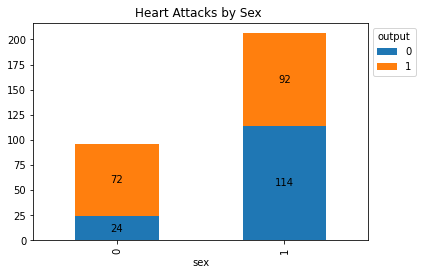

In [85]:
# create the cross tabulation between patients sex and output (heart attack), and assign it to a variable
sex_output_ct = pd.crosstab(patients.sex,patients.output) 
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
sex_output_plot = sex_output_ct.plot(kind = 'bar', stacked = True)
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
sex_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in sex_output_plot.containers:
    sex_output_plot.bar_label(var, label_type = 'center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Sex ') 
# display the stacked bar chart
plt.show()

In [86]:
# assigning to a variable the number of females who have suffered a heart attack
females_affected = 72
# assigning to a variable the number of males who have suffered a heart attack
males_affected = 92
# calculating and assigning to a variable the percentage of females who have suffered a heart attack compared to all the female patients
females_affected_percentage = round((females_affected/patients.sex.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of males who have suffered a heart attack compared to all the male patients
males_affected_percentage = round((males_affected/patients.sex.value_counts()[1])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br> * Out of `{patients.sex.value_counts()[0]}` female patients `{females_affected}` have had a heart attack, which is around `{females_affected_percentage}%` of all females <br><br> * Out of `{patients.sex.value_counts()[1]}` male patients `{males_affected}` have had a heart attack, which is around `{males_affected_percentage}%` of all males")

#### From above graph we can see that: <br><br> * Out of `96` female patients `72` have had a heart attack, which is around `75%` of all females <br><br> * Out of `206` male patients `92` have had a heart attack, which is around `45%` of all males

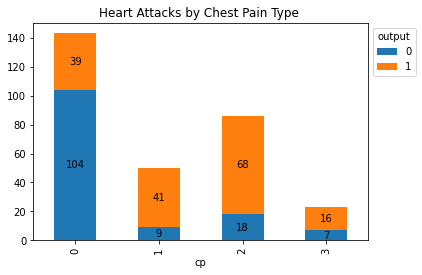

In [87]:
# create the cross tabulation between patients cp (chest pain type) and output (heart attack), and assign it to a variable
cp_output_ct = pd.crosstab(patients.cp, patients.output)
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
cp_output_plot = cp_output_ct.plot(kind = 'bar', stacked = True)
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
cp_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in cp_output_plot.containers:
    cp_output_plot.bar_label(var, label_type = 'center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Chest Pain Type ') 
# display the stacked bar chart
plt.show()

In [88]:
# assigning to a variable the number of patients that have suffered a Typical Angina (0), who have suffered a heart attack
affected_0 = 39
# assigning to a variable the number of patients that have suffered an Atypical Angina (1), who have suffered a heart attack
affected_1 = 41
# assigning to a variable the number of patients that have suffered a Non-Anginal Pain (2), who have suffered a heart attack
affected_2 = 68
# assigning to a variable the number of patients that have suffered a Asymptomatic (3), who have suffered a heart attack
affected_3 = 16
# calculating and assigning to a variable the percentage of patients who have suffered a Typical Angina (0) and suffered a heart attack compared to all the patients that suffered a Typical Angina (0)
affected_0_percentage = round((affected_0/patients.cp.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of patients who have suffered a Atypical Angina (1) and suffered a heart attack compared to all the patients that suffered a Atypical Angina (1)
affected_1_percentage = round((affected_1/patients.cp.value_counts()[1])*100)
# calculating and assigning to a variable the percentage of patients who have suffered a Non-Anginal Pain (2) and suffered a heart attack compared to all the patients that suffered a Non-Anginal Pain (2)
affected_2_percentage = round((affected_2/patients.cp.value_counts()[2])*100)
# calculating and assigning to a variable the percentage of patients who have suffered a Asymptomatic (3) and suffered a heart attack compared to all the patients that suffered a Asymptomatic (3)
affected_3_percentage = round((affected_3/patients.cp.value_counts()[3])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br> Out of `{patients.cp.value_counts()[0]}` patients that suffered from a Typical Angina (0), `{affected_0}` have had a heart attack, which is around `{affected_0_percentage}%` of all the patients that suffered a Typical Angina (0)  <br><br> Out of `{patients.cp.value_counts()[1]}` patients that suffered from a Atypical Angina (1), `{affected_1}` have had a heart attack, which is around `{affected_1_percentage}%` of all the patients that suffered a Atypical Angina (1) <br><br> Out of `{patients.cp.value_counts()[2]}` patients that suffered from a Non-Anginal Pain (2), `{affected_2}` have had a heart attack, which is around `{affected_2_percentage}%` of all the patients that suffered a Non-Anginal Pain (2) <br><br> Out of `{patients.cp.value_counts()[3]}` patients that suffered from a Asymptomatic (3), `{affected_3}` have had a heart attack, which is around `{affected_3_percentage}%` of all the patients that suffered a Asymptomatic (3) <br><br>")

#### From above graph we can see that: <br><br> Out of `143` patients that suffered from a Typical Angina (0), `39` have had a heart attack, which is around `27%` of all the patients that suffered a Typical Angina (0)  <br><br> Out of `50` patients that suffered from a Atypical Angina (1), `41` have had a heart attack, which is around `82%` of all the patients that suffered a Atypical Angina (1) <br><br> Out of `86` patients that suffered from a Non-Anginal Pain (2), `68` have had a heart attack, which is around `79%` of all the patients that suffered a Non-Anginal Pain (2) <br><br> Out of `23` patients that suffered from a Asymptomatic (3), `16` have had a heart attack, which is around `70%` of all the patients that suffered a Asymptomatic (3) <br><br>

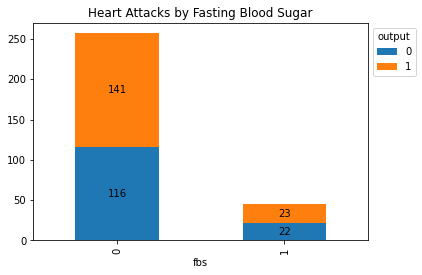

In [89]:
# create the cross tabulation between patients fbs (fasting blood sugar) and output (heart attack), and assign it to a variable
fbs_output_ct = pd.crosstab(patients.fbs, patients.output)
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
fbs_output_plot = fbs_output_ct.plot(kind='bar', stacked=True)
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
fbs_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
# set the value of each bar to be displayed in the center of the bar
for var in fbs_output_plot.containers:
    fbs_output_plot.bar_label(var, label_type='center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Fasting Blood Sugar')
# display the stacked bar chart
plt.show()

In [90]:
# assigning to a variable the number of patients that had fasting blood sugar levels <= 120 mg/dl and suffered a heart attack
affected_0_fbs = 141
# assigning to a variable the number of patients that had fasting blood sugar levels > 120 mg/dl and suffered a heart attack
affected_1_fbs = 23
# calculating and assigning to a variable the percentage of patients that had fasting blood sugar levels <= 120 mg/dl and suffered a heart attack compared to all the patients that had fasting blood sugar levels <= 120 mg/dl
affected_0_fbs_percentage = round((affected_0_fbs/patients.fbs.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of patients that had fasting blood sugar levels > 120 mg/dl and suffered a heart attack compared to all the patients that had fasting blood sugar levels > 120 mg/dl
affected_1_fbs_percentage = round((affected_1_fbs/patients.fbs.value_counts()[1])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br>  Out of `{patients.fbs.value_counts()[0]}` patients that had fasting blood sugar levels <= 120 mg/dl, `{affected_0_fbs}` have had a heart attack, which is around `{affected_0_fbs_percentage}%` of all the patients that has fasting blood sugar levels <= 120 mg/dl <br><br>  Out of `{patients.fbs.value_counts()[1]}` patients that had fasting blood sugar levels > 120 mg/dl, `{affected_1_fbs}` have had a heart attack, which is around `{affected_1_fbs_percentage}%` of all the patients that has fasting blood sugar levels > 120 mg/dl <br><br>")

#### From above graph we can see that: <br><br>  Out of `257` patients that had fasting blood sugar levels <= 120 mg/dl, `141` have had a heart attack, which is around `55%` of all the patients that has fasting blood sugar levels <= 120 mg/dl <br><br>  Out of `45` patients that had fasting blood sugar levels > 120 mg/dl, `23` have had a heart attack, which is around `51%` of all the patients that has fasting blood sugar levels > 120 mg/dl <br><br>

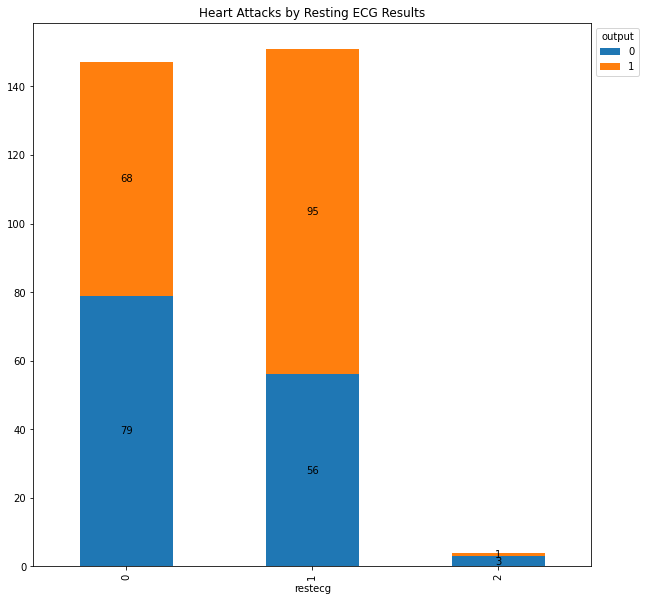

In [91]:
# create the cross tabulation between patients restecg (resting ECG results) and output (heart attack), and assign it to a variable
restecg_output_ct = pd.crosstab(patients.restecg, patients.output)
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
restecg_output_plot = restecg_output_ct.plot(kind = 'bar', stacked = True, figsize = (10, 10))
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
restecg_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in restecg_output_plot.containers:
    restecg_output_plot.bar_label(var, label_type='center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Resting ECG Results')
# display the stacked bar chart
plt.show()

In [92]:
# assigning to a variable the number of patients that showed Normal (0) results from the rested ECG and suffered a heart attack
affected_0_restecg = 68
# assigning to a variable the number of patients that showed ST-T Wave abnormality (1) results from the rested ECG and suffered a heart attack
affected_1_restecg = 95
# assigning to a variable the number of patients has or showed signs of left ventricular hypertrophy (2) results from the rested ECG and suffered a heart attack
affected_2_restecg = 1
# calculating and assigning to a variable the percentage of patients that showed Normal (0) results from the rested ECG and suffered a heart attack compared to all the patients that showed Normal (0) results from the rested ECG
affected_0_restecg_percentage = round((affected_0_restecg/patients.restecg.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of patients that showed ST-T Wave abnormality (1) results from the rested ECG and suffered a heart attack compared to all the patients that showed ST-T Wave abnormality (1) results from the rested ECG
affected_1_restecg_percentage = round((affected_1_restecg/patients.restecg.value_counts()[1])*100)
# calculating and assigning to a variable the percentage of patients has or showed signs of left ventricular hypertrophy (2) results from the rested ECG and suffered a heart attack compared to all the patients that has or showed signs of left ventricular hypertrophy (2) results from the rested ECG
affected_2_restecg_percentage = round((affected_2_restecg/patients.restecg.value_counts()[2])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br>  Out of `{patients.restecg.value_counts()[0]}` patients that showed Normal (0) results from the rested ECG, `{affected_0_restecg}` have had a heart attack, which is around `{affected_0_restecg_percentage}%` of all the patients that showed Normal (0) results from the rested ECG <br><br> Out of `{patients.restecg.value_counts()[1]}` patients that showed ST-T Wave abnormality (1) from the rested ECG results, `{affected_1_restecg}` have had a heart attack, which is around `{affected_1_restecg_percentage}%` of all the patients that showed ST-T Wave abnormality (1) from the rested ECG results <br><br> Out of `{patients.restecg.value_counts()[2]}` patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results, `{affected_2_restecg}` have had a heart attack, which is around `{affected_2_restecg_percentage}%` of all the patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results <br><br>")

#### From above graph we can see that: <br><br>  Out of `147` patients that showed Normal (0) results from the rested ECG, `68` have had a heart attack, which is around `46%` of all the patients that showed Normal (0) results from the rested ECG <br><br> Out of `151` patients that showed ST-T Wave abnormality (1) from the rested ECG results, `95` have had a heart attack, which is around `63%` of all the patients that showed ST-T Wave abnormality (1) from the rested ECG results <br><br> Out of `4` patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results, `1` have had a heart attack, which is around `25%` of all the patients that has or showed signs of left ventricular hypertrophy (2) from the rested ECG results <br><br>

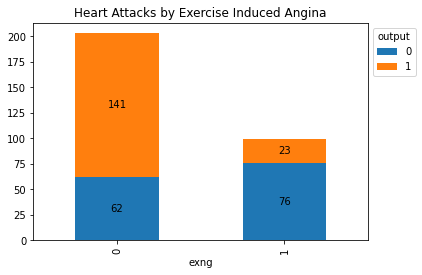

In [93]:
# create the cross tabulation between patients exng (angina induced through exercise) and output (heart attack), and assign it to a variable
exng_output_ct = pd.crosstab(patients.exng, patients.output)
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
exng_output_plot = exng_output_ct.plot(kind = 'bar', stacked = True)
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
exng_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in exng_output_plot.containers:
    exng_output_plot.bar_label(var, label_type = 'center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Exercise Induced Angina')
# display the stacked bar chart
plt.show()

In [94]:
# assigning to a variable the number of patients that did not show Angina induced through exercise and suffered a heart attack
affected_0_exng = 141
# assigning to a variable the number of patients that showed Angina induced through exercise and suffered a heart attack
affected_1_exng = 23
# calculating and assigning to a variable the percentage of patients that did not show Angina induced through exercise and suffered a heart attack compared to all the patients that did not show Angina induced through exercise
affected_0_exng_percentage = round((affected_0_exng/patients.exng.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of patients that showed Angina induced through exercise and suffered a heart attack compared to all the patients that showed Angina induced through exercise
affected_1_exng_percentage = round((affected_1_exng/patients.exng.value_counts()[1])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br>   Out of `{patients.exng.value_counts()[0]}` patients that did not show Angina induced through exercise, `{affected_0_exng}` have had a heart attack, which is around `{affected_0_exng_percentage}%` of all the patients that did not show Angina induced through exercise <br><br>  Out of `{patients.exng.value_counts()[1]}` patients that showed Angina induced through exercise, `{affected_1_exng}` have had a heart attack, which is around `{affected_1_exng_percentage}%` of all the patients that showed Angina induced through exercise <br><br>")

#### From above graph we can see that: <br><br>   Out of `203` patients that did not show Angina induced through exercise, `141` have had a heart attack, which is around `69%` of all the patients that did not show Angina induced through exercise <br><br>  Out of `99` patients that showed Angina induced through exercise, `23` have had a heart attack, which is around `23%` of all the patients that showed Angina induced through exercise <br><br>

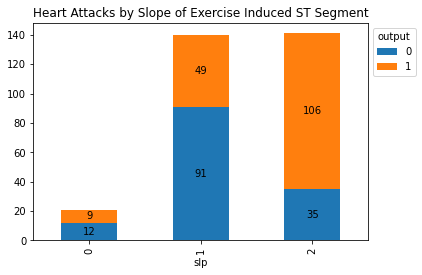

In [95]:
# create the cross tabulation between slope of the exercise induced ST segment of patients and output (heart attack), and assign it to a variable
slp_output_ct = pd.crosstab(patients.slp, patients.output)
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
slp_output_plot = slp_output_ct.plot(kind = 'bar', stacked = True)
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
slp_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in slp_output_plot.containers:
    slp_output_plot.bar_label(var, label_type = 'center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Slope of Exercise Induced ST Segment') 
# display the stacked bar chart
plt.show()

In [96]:
# assigning to a variable the number of patients with Upsloping exercise induced ST segment and suffered a heart attack
affected_0_slp = 9
# assigning to a variable the number of patients with Flatloping exercise induced ST segment and suffered a heart attack
affected_1_slp = 49
# assigning to a variable the number of patients with Downsloping exercise induced ST segment and suffered a heart attack
affected_2_slp = 106
# calculating and assigning to a variable the percentage of patients with Upsloping exercise induced ST segment and suffered a heart attack compared to all the patients with Upsloping exercise induced ST segment
affected_0_slp_percentage = round((affected_0_slp/patients.slp.value_counts()[0])*100)
# calculating and assigning to a variable the percentage of patients with Flatloping exercise induced ST segment and suffered a heart attack compared to all the patients with Flatloping exercise induced ST segment
affected_1_slp_percentage = round((affected_1_slp/patients.slp.value_counts()[1])*100)
# calculating and assigning to a variable the percentage of patients with Downsloping exercise induced ST segment and suffered a heart attack compared to all the patients with Downsloping exercise induced ST segment
affected_2_slp_percentage = round((affected_2_slp/patients.slp.value_counts()[2])*100)
# printing the formatted sentences
md(f"#### From above graph we can see that: <br><br>  Out of `{patients.slp.value_counts()[0]}` patients with Upsloping exercise induced ST segment, `{affected_0_slp}` have had a heart attack, which is around `{affected_0_slp_percentage}%` of all the patients with Upsloping exercise induced ST segment <br><br> Out of `{patients.slp.value_counts()[1]}` patients with Flatloping exercise induced ST segment, `{affected_1_slp}` have had a heart attack, which is around `{affected_1_slp_percentage}%` of all the patients with Flatsloping exercise induced ST segment <br><br> Out of `{patients.slp.value_counts()[2]}` patients with Downsloping exercise induced ST segment, `{affected_2_slp}` have had a heart attack, which is around `{affected_2_slp_percentage}%` of all the patients with Downsloping exercise induced ST segment <br><br>")

#### From above graph we can see that: <br><br>  Out of `21` patients with Upsloping exercise induced ST segment, `9` have had a heart attack, which is around `43%` of all the patients with Upsloping exercise induced ST segment <br><br> Out of `140` patients with Flatloping exercise induced ST segment, `49` have had a heart attack, which is around `35%` of all the patients with Flatsloping exercise induced ST segment <br><br> Out of `141` patients with Downsloping exercise induced ST segment, `106` have had a heart attack, which is around `75%` of all the patients with Downsloping exercise induced ST segment <br><br>

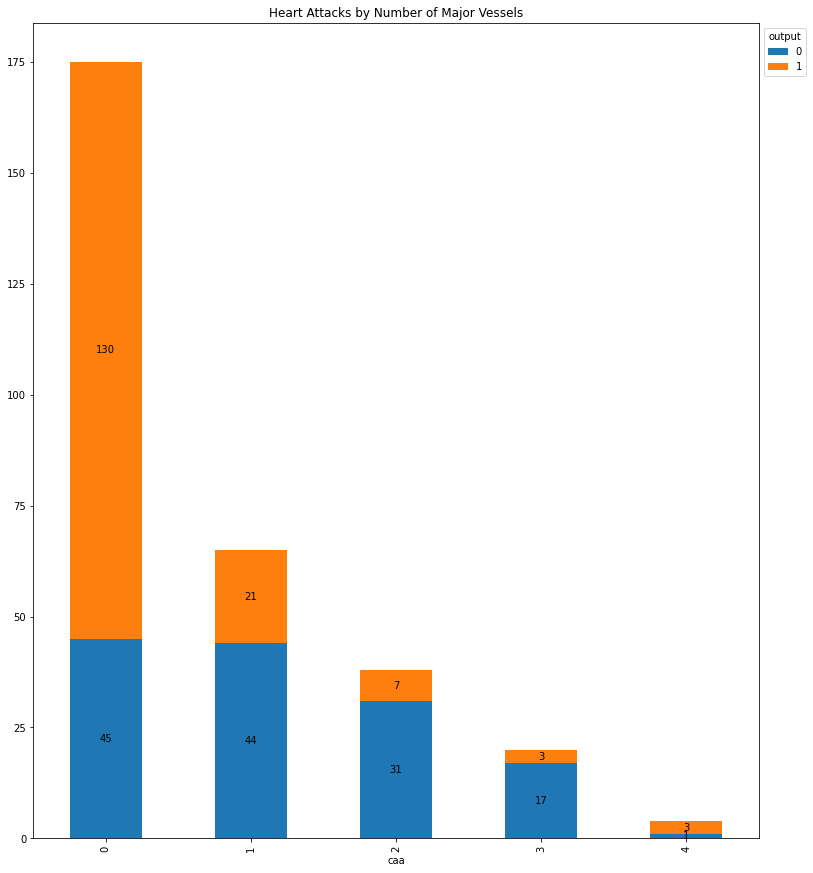

In [97]:
# create the cross tabulation between the number of Major Vessels of a patient and output (heart attack), and assign it to a variable
caa_output_ct = pd.crosstab(patients.caa, patients.output) 
# plot a stacked bar chart using the variable created above and assigning the output to a new variable
caa_output_plot = caa_output_ct.plot(kind = 'bar', stacked = True, figsize = (13,15))
# creating the legend for the stacked bar chart depecting the colour and values of the columns which represent the output
caa_output_plot.legend(title = 'output', bbox_to_anchor = (1, 1), loc = 'upper left')
# set the value of each bar to be displayed in the center of the bar
for var in caa_output_plot.containers:
    caa_output_plot.bar_label(var, label_type = 'center')
# set the title of the stacked bar chart
plt.title('Heart Attacks by Number of Major Vessels') 
# display the stacked bar chart
plt.show()

In [98]:
affected_0_caa = 130
affected_1_caa = 21
affected_2_caa = 7
affected_3_caa = 3
affected_4_caa = 3
affected_0_caa_percentage = round((affected_0_caa/patients.caa.value_counts()[0])*100)
affected_1_caa_percentage = round((affected_1_caa/patients.caa.value_counts()[1])*100)
affected_2_caa_percentage = round((affected_2_caa/patients.caa.value_counts()[2])*100)
affected_3_caa_percentage = round((affected_3_caa/patients.caa.value_counts()[3])*100)
affected_4_caa_percentage = round((affected_4_caa/patients.caa.value_counts()[4])*100)
md(f"#### From above graph we can see that: <br><br>  Out of `{patients.caa.value_counts()[0]}` patients with 0 Major Vessels, `{affected_0_caa}` have had a heart attack, which is around `{affected_0_caa_percentage}%` of all the patients with 0 Major Vessels <br><br>  Out of `{patients.caa.value_counts()[1]}` patients with 1 Major Vessels, `{affected_1_caa}` have had a heart attack, which is around `{affected_1_caa_percentage}%` of all the patients with 1 Major Vessels <br><br> Out of `{patients.caa.value_counts()[2]}` patients with 2 Major Vessels, `{affected_2_caa}` have had a heart attack, which is around `{affected_2_caa_percentage}%` of all the patients with 2 Major Vessels <br><br>  Out of `{patients.caa.value_counts()[3]}` patients with 3 Major Vessels, `{affected_3_caa}` have had a heart attack, which is around `{affected_3_caa_percentage}%` of all the patients with 3 Major Vessels <br><br> Out of `{patients.caa.value_counts()[4]}` patients with 4 Major Vessels, `{affected_4_caa}` have had a heart attack, which is around `{affected_4_caa_percentage}%` of all the patients with 4 Major Vessels <br><br>")

#### From above graph we can see that: <br><br>  Out of `175` patients with 0 Major Vessels, `130` have had a heart attack, which is around `74%` of all the patients with 0 Major Vessels <br><br>  Out of `65` patients with 1 Major Vessels, `21` have had a heart attack, which is around `32%` of all the patients with 1 Major Vessels <br><br> Out of `38` patients with 2 Major Vessels, `7` have had a heart attack, which is around `18%` of all the patients with 2 Major Vessels <br><br>  Out of `20` patients with 3 Major Vessels, `3` have had a heart attack, which is around `15%` of all the patients with 3 Major Vessels <br><br> Out of `4` patients with 4 Major Vessels, `3` have had a heart attack, which is around `75%` of all the patients with 4 Major Vessels <br><br>

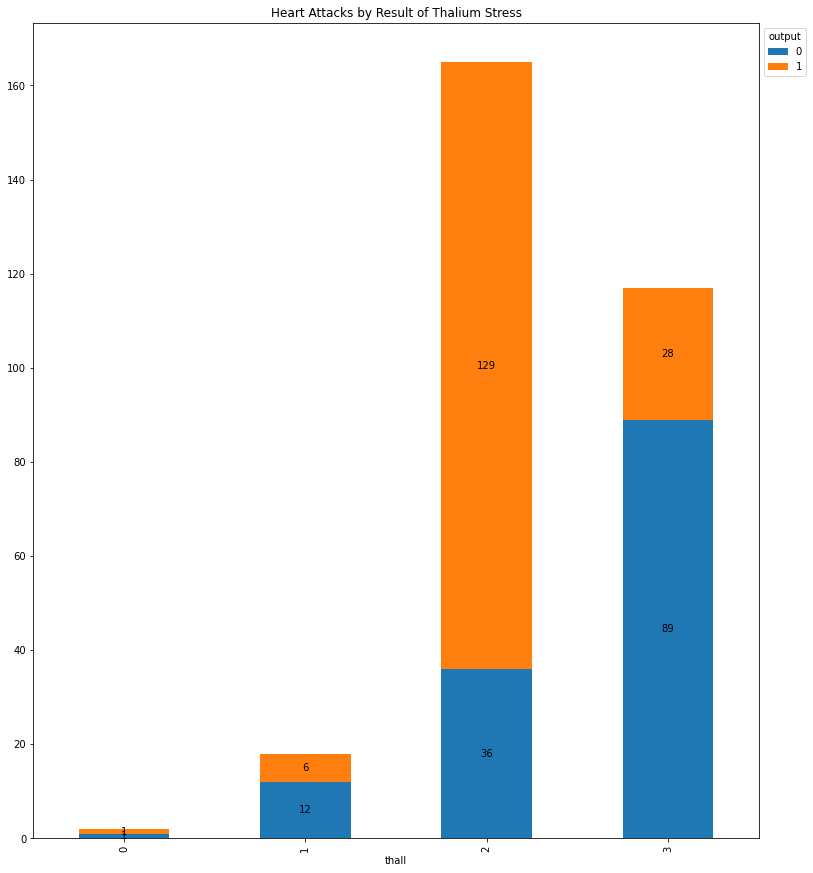

In [99]:
thall_output_ct=pd.crosstab(patients.thall,patients.output) 
thall_output_plot = thall_output_ct.plot(kind='bar', stacked=True, figsize=(13,15))
thall_output_plot.legend(title='output', bbox_to_anchor=(1, 1), loc='upper left')
for var in thall_output_plot.containers:
    thall_output_plot.bar_label(var, label_type='center')
plt.title('Heart Attacks by Result of Thalium Stress') 
plt.show()

In [100]:
affected_0_thall = 1
affected_1_thall = 6
affected_2_thall = 129
affected_3_thall = 28
affected_0_thall_percentage = round((affected_0_thall/patients.thall.value_counts()[0])*100)
affected_1_thall_percentage = round((affected_1_thall/patients.thall.value_counts()[1])*100)
affected_2_thall_percentage = round((affected_2_thall/patients.thall.value_counts()[2])*100)
affected_3_thall_percentage = round((affected_3_thall/patients.thall.value_counts()[3])*100)
md(f"#### From above graph we can see that: <br><br>  Out of `{patients.thall.value_counts()[0]}` patients with 0 as the result of the thalium stress test, `{affected_0_thall}` have had a heart attack, which is around `{affected_0_thall_percentage}%` of all the patients with 0 as the result of the thalium stress test <br><br>  Out of `{patients.thall.value_counts()[1]}` patients with 1 as the result of the thalium stress test, `{affected_1_thall}` have had a heart attack, which is around `{affected_1_thall_percentage}%` of all the patients with 1 as the result of the thalium stress test <br><br>  Out of `{patients.thall.value_counts()[2]}` patients with 2 as the result of the thalium stress test, `{affected_2_thall}` have had a heart attack, which is around `{affected_2_thall_percentage}%` of all the patients with 2 as the result of the thalium stress test <br><br>  Out of `{patients.thall.value_counts()[3]}` patients with 3 as the result of the thalium stress test, `{affected_3_thall}` have had a heart attack, which is around `{affected_3_thall_percentage}%` of all the patients with 3 as the result of the thalium stress test <br><br>")

#### From above graph we can see that: <br><br>  Out of `2` patients with 0 as the result of the thalium stress test, `1` have had a heart attack, which is around `50%` of all the patients with 0 as the result of the thalium stress test <br><br>  Out of `18` patients with 1 as the result of the thalium stress test, `6` have had a heart attack, which is around `33%` of all the patients with 1 as the result of the thalium stress test <br><br>  Out of `165` patients with 2 as the result of the thalium stress test, `129` have had a heart attack, which is around `78%` of all the patients with 2 as the result of the thalium stress test <br><br>  Out of `117` patients with 3 as the result of the thalium stress test, `28` have had a heart attack, which is around `24%` of all the patients with 3 as the result of the thalium stress test <br><br>

### Noticable facts from the bar graphs plotted above:




### Correlation Matrix

#### Let us plot the correlation matrix for the continuous variables

(5.0, 0.0)

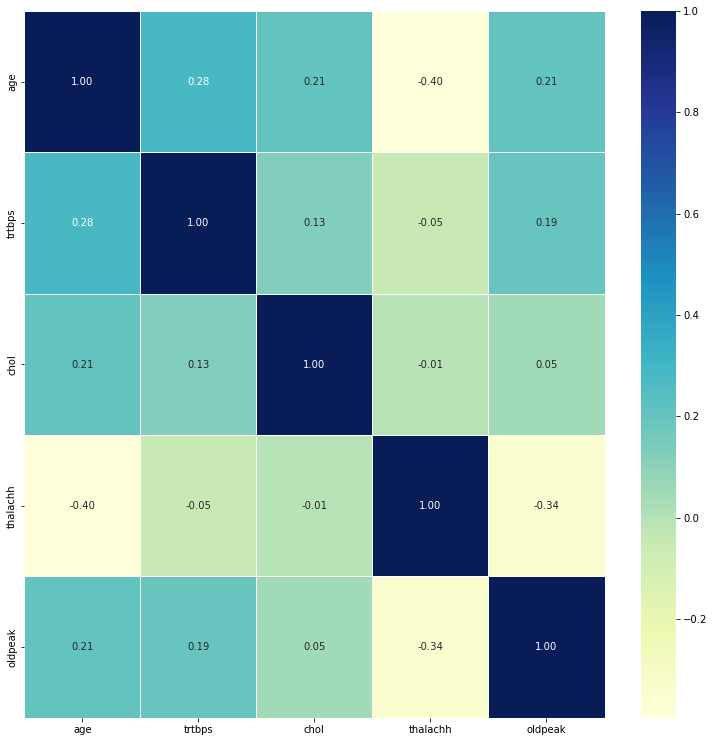

In [101]:
correlation_matrix = patients[continuous_val].corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns_heatmap = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".2f",
                 cmap="YlGnBu"
                );
bottom, top = sns_heatmap.get_ylim()
sns_heatmap.set_ylim(bottom, top)

In [102]:
patients[continuous_val].corrwith(patients.output).hvplot.barh(
    width=600,
    title="Correlation between Heart Attacks and Continuous Variables", 
    ylabel='Correlation', 
    xlabel='Continuous Variables',
)

:Bars   [index]   (0)

#### Looking the above correlation matrix we can see that:


#### `thalachh` (the maximum heart rate that was achieved) has the strongest positive correlation with the output, which means the chances of getting a heart attack increases with the increase of the heart rate.



#### `oldpeak` has the strongest negative correlation with the output, which means the chances of getting a heart attack decreases with the increase of oldpeak.


#### `chol` (cholesterol) has the lowest correlation value with the output, which means there is very little association between the cholesterol level and the chances of getting a heart attack.


## Data Processing


#### Let us convert the categorical variables into dummy values using the `get_dummies` from `pandas` to create dummy columns since some machine learning models (most regression models) are unable to handle categorical variables.

In [103]:
categorical_val = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
updatedPatients = pd.get_dummies(patients, columns = categorical_val)
updatedPatients.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### Next, let us scale the continuos variables using `StandardScaler` from `sklearn.preprocessing` which will make learning and understanding the problem easy for the models.

In [104]:
standardScaler = StandardScaler()
updatedPatients[continuous_val] = standardScaler.fit_transform(updatedPatients[continuous_val])
updatedPatients.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.95,0.76,-0.26,0.02,1.08,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.93,-0.09,0.07,1.64,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.49,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.17,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.59,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Model Building


#### Let us split our dataset into training and testing datasets , using the `train_test_split` method from `sklearn.model_selection`

In [105]:
X = updatedPatients.drop('output', axis=1)
y = updatedPatients.output

# splitting the dataset into training and testing datasets with 20% allocated to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Logistic Regression Model with Hyperparameter Tuning

In [106]:
# defining the range of parameters
parameter_grid = { 'penalty' : ['none', 'elasticnet', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100, 100],
               'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
               'max_iter' : [20, 50, 100, 200, 500]}

grid_results = GridSearchCV(LogisticRegression(), parameter_grid, cv = 3, refit = True, verbose = True, n_jobs=-1, scoring='accuracy', error_score=0)

# fitting the model to be grid searched
grid_results.fit(X_train, y_train)

best_params = grid_results.best_params_

# print the best parameter decided on after hyperparameter tuning
print(best_params)

# assigning the values from the best_params_ to individual variables
C = best_params['C']
max_iter = best_params['max_iter']
penalty = best_params['penalty']
solver = best_params['solver']

# print how the model looks like after hyperparameter tuning
print(grid_results.best_estimator_)

prediction = grid_results.predict(X_test)
 
# assign values of classification_report to a variable after converting to a dictionary
report = classification_report(y_test, prediction, output_dict=True)

# print the classification report
print(classification_report(y_test, prediction))

# assigning the values from the classification_report to individual variables
precision_1 = report['1']['precision']
accuracy = report['accuracy']
recall_1 = report['1']['recall']
f1_score_1 = report['1']['f1-score']
tot_test_dataset = report['macro avg']['support']
test_dataset_1 = report['1']['support']
test_dataset_0 = report['0']['support']


md(f"#### The highest accuracy of `{int(round(accuracy, 2)*100)}`% is achieved by the algorithm when the following hyperparameter are used: <br><br> * `C`: `{C}` <br><br> * `max_iter`: `{max_iter}` <br><br> * `penalty`: `{penalty}` <br><br> * `solver`: `{solver}` <br><br><br><br> Let us break down the classification report further <br><br> * `precision`: Out of all the patients that the model predicted would suffer a heart attack, `{int(round(precision_1, 2)*100)}`% actually did. <br><br> * `recall`: Out of all the patients that actually suffered a heart attack, the model predicted that outcome correctly for `{int(round(recall_1, 2)*100)}`% of those players. <br><br> * `f1-score`: `{round(f1_score_1, 2)}` : Since the value is close to 1, it tells us that the model does a great job at predicting whether or not a person will suffer a heart attack. <br><br> * `support`: This value tells us how many patients belonged to each class in the test dataset, which is `{tot_test_dataset}` in this case. We can see that among those patients in the test dataset, `{test_dataset_1}` did suffer a heart attack, while the remaining `{test_dataset_0}` did not.")


Fitting 3 folds for each of 600 candidates, totalling 1800 fits
{'C': 0.1, 'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.1, max_iter=20)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



#### The highest accuracy of `89`% is achieved by the algorithm when the following hyperparameter are used: <br><br> * `C`: `0.1` <br><br> * `max_iter`: `20` <br><br> * `penalty`: `l2` <br><br> * `solver`: `lbfgs` <br><br><br><br> Let us break down the classification report further <br><br> * `precision`: Out of all the patients that the model predicted would suffer a heart attack, `90`% actually did. <br><br> * `recall`: Out of all the patients that actually suffered a heart attack, the model predicted that outcome correctly for `88`% of those players. <br><br> * `f1-score`: `0.89` : Since the value is close to 1, it tells us that the model does a great job at predicting whether or not a person will suffer a heart attack. <br><br> * `support`: This value tells us how many patients belonged to each class in the test dataset, which is `61` in this case. We can see that among those patients in the test dataset, `32` did suffer a heart attack, while the remaining `29` did not.